In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [10]:
# importing data
house_data = pd.read_csv('raw_house_data.csv')
house_data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [ ]:
# checking data types of the columns
house_data.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [ ]:
# checking column names
house_data.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [ ]:
# checking DataFrame size
house_data.shape

(5000, 16)

In [ ]:
# checking duplicate rows in the dataframe
duplicates = house_data.duplicated()
len(duplicates[duplicates==True])

0

In [ ]:
# checking if there is missing data
columns_to_check = ['MLS','sold_price','zipcode','longitude','latitude','lot_acres','taxes','year_built','bedrooms','bathrooms','sqrt_ft','garage','kitchen_features','fireplaces','floor_covering','HOA']
nul_count = house_data[columns_to_check].isnull()
nul_count.sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


In [11]:
# Creating a function to remove null, 0 and outliers
def remove_nul_zero_outliers(df,column):
  house_data_non_zero = df[df[column] != 0]
  house_data_non_nul = house_data_non_zero[house_data_non_zero[column].notna()]

  Q1 = house_data_non_nul[column].quantile(0.25)
  Q3 = house_data_non_nul[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  print(f'IQR: {IQR} ,lower_bound: {lower_bound}, upper_bound: {upper_bound}')

  house_data_outlier_removed = house_data_non_nul[(house_data_non_nul[column]<= upper_bound) & (house_data_non_nul[column]>= lower_bound)]

  # ploting histograms
  plt.figure(figsize=(10,6))
  sns.histplot(house_data_outlier_removed[column], bins=50)
  plt.show()

  return house_data_outlier_removed

# replace null, 0 with median
def replace_null_zero_with_median(house_data_outlier_removed,column,df):
  column_median = house_data_outlier_removed[column].median()
  house_data_replaced = df.copy()
  house_data_replaced[column] = house_data_replaced[column].replace(0,column_median)
  house_data_replaced[column] = house_data_replaced[column].fillna(column_median)

  return house_data_replaced

# replace null, 0 with mean
def replace_null_zero_with_mean(house_data_outlier_removed,column,df):
  column_mean = house_data_outlier_removed[column].mean()
  house_data_replaced = df.copy()
  house_data_replaced[column] = house_data_replaced[column].replace(0,column_mean)
  house_data_replaced[column] = house_data_replaced[column].fillna(column_mean)

  return house_data_replaced


lot_acres

IQR: 1.185 ,lower_bound: -1.1875, upper_bound: 3.5525


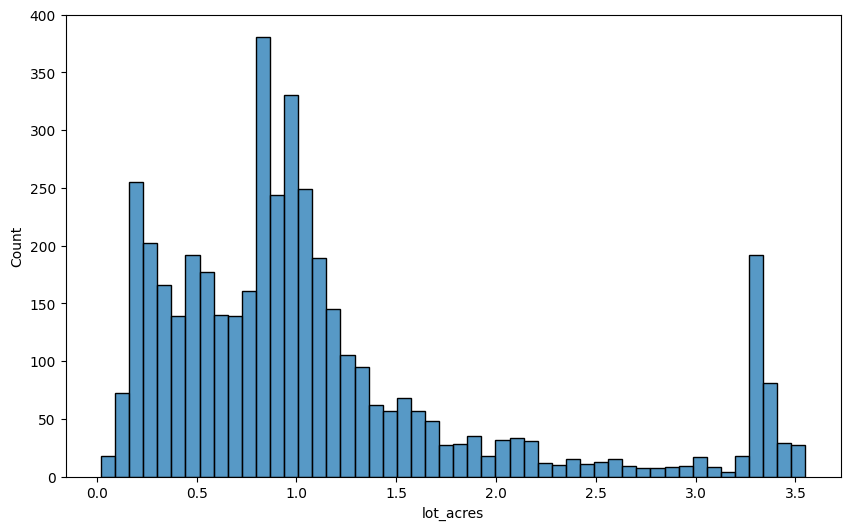

In [15]:
#cleaning lot_acres column
column = 'lot_acres'
house_data_outlier_removed_lot_acres = remove_nul_zero_outliers(house_data,column)

In [16]:
# replace lot_acers column
column = 'lot_acres'
house_data_replaced_lot_acres = replace_null_zero_with_median(house_data_outlier_removed_lot_acres,column,house_data)


sqrt_ft

IQR: 1083.25 ,lower_bound: 1422.125, upper_bound: 5755.125


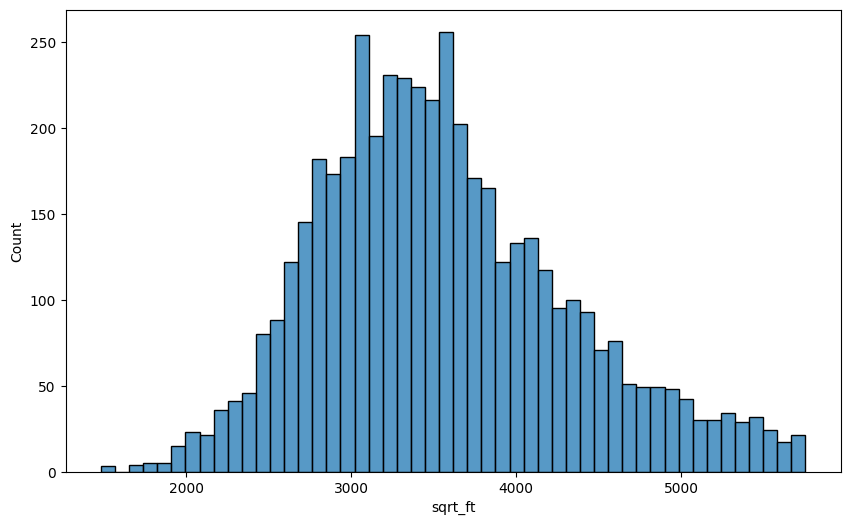

In [17]:
#cleaning sqrt_ft column
column = 'sqrt_ft'
house_data_outlier_removed_sqrt_ft = remove_nul_zero_outliers(house_data_replaced_lot_acres,column)

In [18]:
# replace sqrt_ft column
column = 'sqrt_ft'
house_data_replaced_sqrt_ft = replace_null_zero_with_mean(house_data_outlier_removed_sqrt_ft,column,house_data_replaced_lot_acres)


taxes

IQR: 3277.2999999999993 ,lower_bound: -93.74999999999818, upper_bound: 13015.449999999999


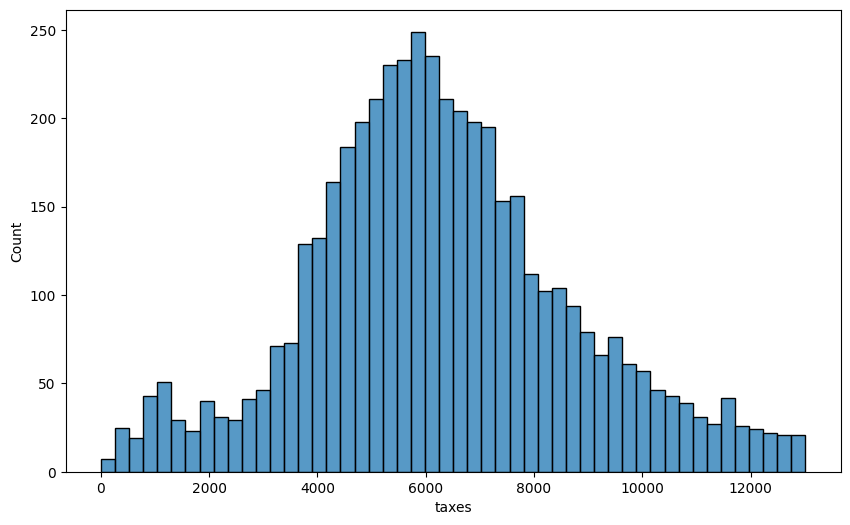

In [19]:
#cleaning taxes column
column = 'taxes'
house_data_outlier_removed_taxes = remove_nul_zero_outliers(house_data_replaced_sqrt_ft,column)

In [20]:
# replace taxes column
column = 'taxes'
house_data_replaced_taxes = replace_null_zero_with_mean(house_data_outlier_removed_taxes,column,house_data_replaced_sqrt_ft)


HOA

In [13]:
#converting the data type in the  HOA columns
house_data['HOA'] = house_data['HOA'].str.replace(',','',regex=True)
house_data['HOA'] = house_data['HOA'].astype(float)

IQR: 108.0 ,lower_bound: -122.0, upper_bound: 310.0


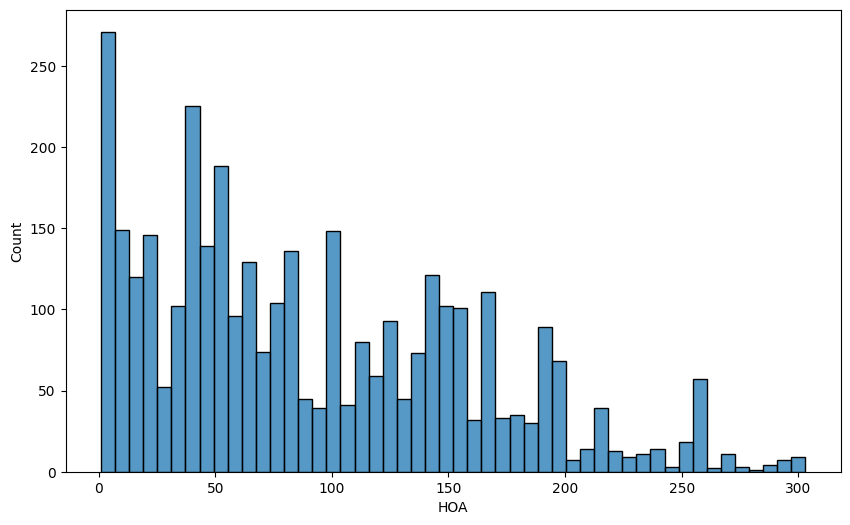

In [21]:
#cleaning HOA column
column = 'HOA'
house_data_outlier_removed_hoa = remove_nul_zero_outliers(house_data_replaced_taxes,column)

In [22]:
#since its a bit skewd distribution  impute the column with median
column = 'HOA'
house_data_replaced_hoa = replace_null_zero_with_median(house_data_outlier_removed_hoa,column,house_data_replaced_taxes)


In [27]:
# checking DataFrame size
#house_data_replaced_hoa.shape
house_data_replaced_hoa.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [29]:
# checking if there is missing data
columns_to_check = ['lot_acres','taxes','sqrt_ft','HOA']
nul_count = house_data_replaced_hoa[columns_to_check].isnull()
nul_count.sum()

,0
lot_acres,0
taxes,0
sqrt_ft,0
HOA,0


In [30]:
# saving the imputed dataframe with outliers
house_data_replaced_hoa.to_csv('house_data_clean_imputed.csv')

In [ ]:
house_data_cleaned = house_data_replaced_taxes.copy()

<Axes: >

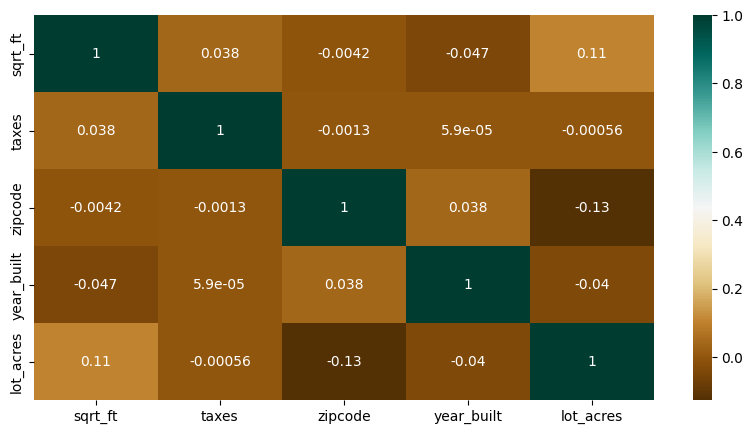

In [ ]:
# plot corelation graph with outliers
cols_selected = ['sqrt_ft','taxes','zipcode','year_built','lot_acres']
df_house_data_selected = house_data_cleaned[cols_selected]

# sns.pairplot(df_house_data_selected)
# plt.show()

plt.figure(figsize=(10,5))
c = df_house_data_selected.corr()
sns.heatmap(c, cmap="BrBG", annot =True)

<Axes: >

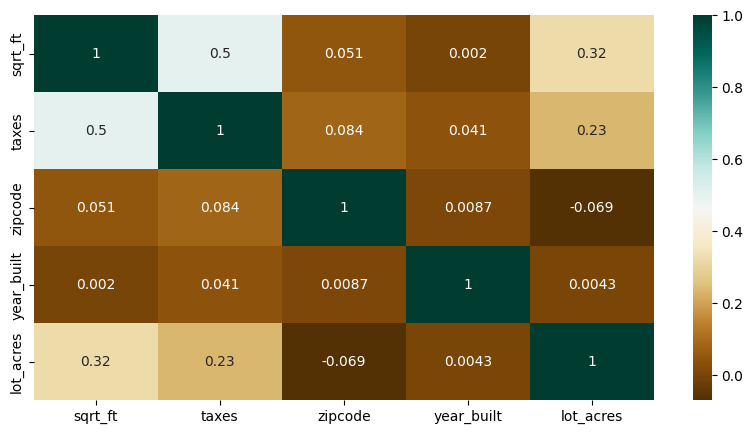

In [ ]:
def remove_outliers(df,column):

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  df_outlier_removed = df[(df[column]<= upper_bound) & (df[column]>= lower_bound)]

  return df_outlier_removed


columns = ['sqrt_ft','taxes','lot_acres']

df = house_data_cleaned

for col in columns:
  df_outlier_removed = remove_outliers(df,col)
  df = df_outlier_removed

# plot corelation graph without outliers
cols_selected = ['sqrt_ft','taxes','zipcode','year_built','lot_acres']
df_house_data_selected = df[cols_selected]

plt.figure(figsize=(10,5))
c = df_house_data_selected.corr()
sns.heatmap(c, cmap="BrBG", annot =True)

In [ ]:
# size of outlier removed dataframe
df.shape

(3771, 16)

In [ ]:
# saving the imputed dataframe with outlier removed
df.to_csv('house_data_clean_outlier_removed.csv')


In [3]:
# importing imputed outlier removed data
house_data_clean_outlier_removed = pd.read_csv('/content/house_data_clean_outlier_removed.csv')
house_data_clean_outlier_removed.head()

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,20,21207846,2600000.0,85739,-110.883065,32.508778,0.90,8753.35,2008,3,3.0,3095.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3.0,"Natural Stone, Wood",0
1,40,21221120,2224506.0,85658,-111.096767,32.467444,0.77,1286.59,2012,3,4.0,4724.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Natural Stone, Wood",550
2,44,21824716,2331000.0,85718,-110.941781,32.350810,1.26,6656.20,2018,4,6.0,5550.0,4.0,"Dishwasher, Garbage Disposal, Gas Range, Islan...",1.0,Ceramic Tile,169
3,46,21707019,2296443.0,85658,-111.096171,32.467398,0.91,1896.71,2018,3,4.0,4850.0,3.0,"Dishwasher, Freezer, Garbage Disposal, Refrige...",2.0,"Carpet, Natural Stone",550
4,57,21601233,1750000.0,85718,-110.877379,32.331167,1.31,10956.02,1994,4,6.0,4907.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4.0,"Carpet, Natural Stone",258


In [4]:
house_data_eda = house_data_clean_outlier_removed.copy()


Text(0, 0.5, 'zipcode')

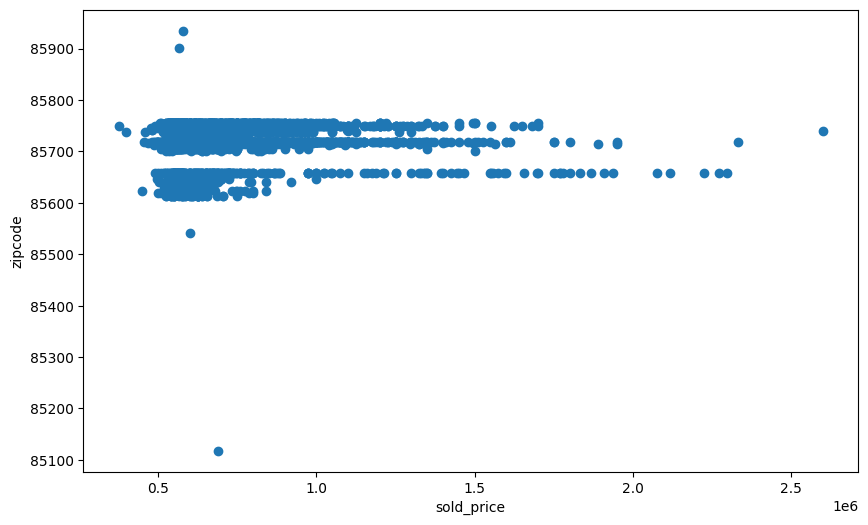

In [5]:
# ploting sold_price	and zipcode
fig, ax =plt.subplots(figsize=(10,6))
ax.scatter(house_data_eda['sold_price'],house_data_eda['zipcode'] )
ax.set_xlabel('sold_price')
ax.set_ylabel('zipcode')

Text(0, 0.5, 'zipcode')

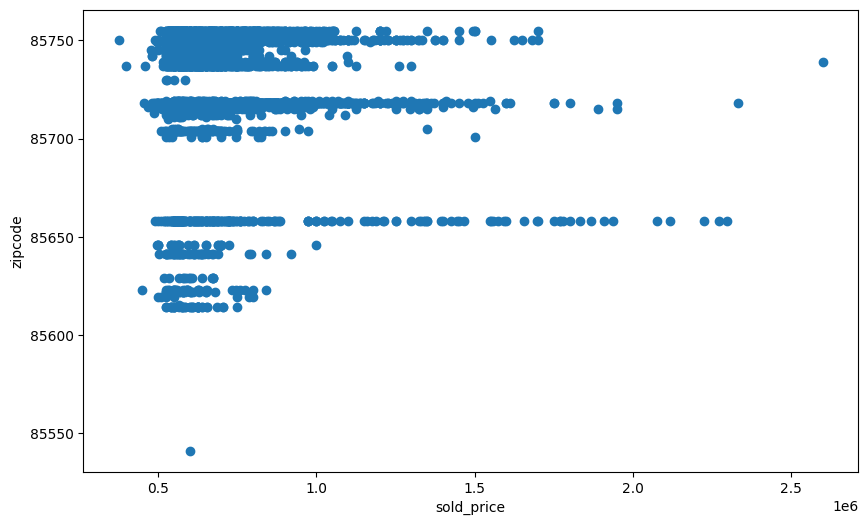

In [6]:
# ploting sold_price	and zipcode
house_data_optimised = house_data_eda[(house_data_eda['zipcode']<=85800) & (house_data_eda['zipcode']>=85500)]
fig, ax =plt.subplots(figsize=(10,6))
ax.scatter(house_data_optimised['sold_price'],house_data_optimised['zipcode'] )
ax.set_xlabel('sold_price')
ax.set_ylabel('zipcode')

In [7]:
#converting the data type in the  HOA columns
house_data_eda['HOA'] = house_data_eda['HOA'].str.replace(',','',regex=True)
house_data_eda['HOA'] = house_data_eda['HOA'].astype(float)

In [8]:
house_data_eda['HOA'].dtype
house_data_eda.dtypes

,0
Unnamed: 0,int64
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64


Text(0, 0.5, 'zipcode')

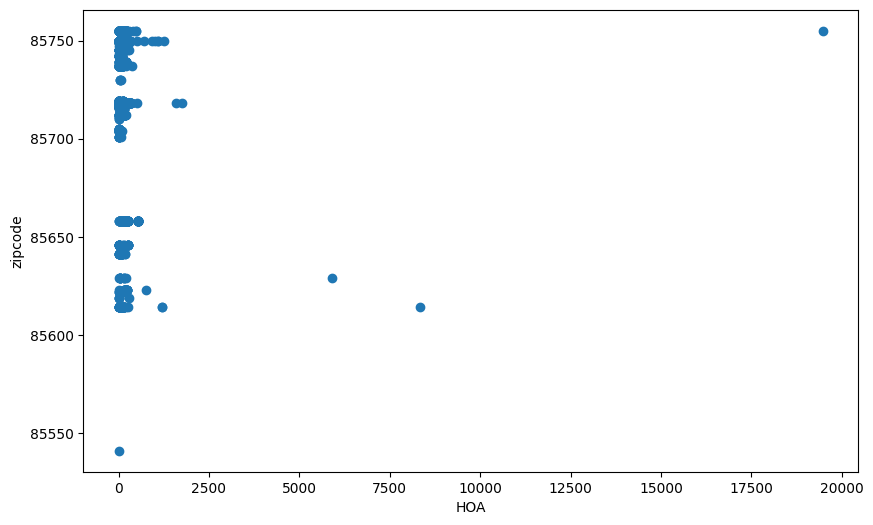

In [ ]:
# ploting HOA	and zipcode
house_data_optimised = house_data_eda[(house_data_eda['zipcode']<=85800) & (house_data_eda['zipcode']>=85500)]
fig, ax =plt.subplots(figsize=(10,6))
ax.scatter(house_data_optimised['HOA'],house_data_optimised['zipcode'] )
ax.set_xlabel('HOA')
ax.set_ylabel('zipcode')

<Axes: xlabel='HOA'>

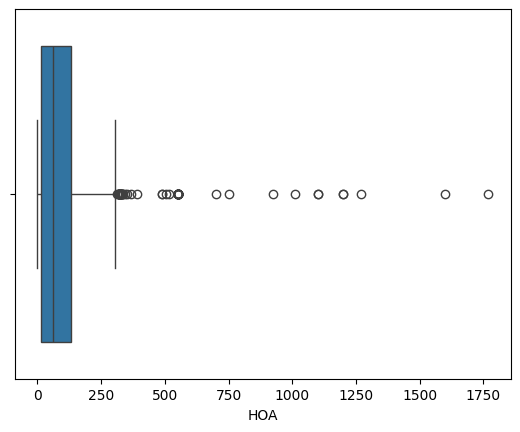

In [ ]:
# ploting 'HOA' distribution on a box plot
df_hoa = house_data_optimised[(house_data_optimised['HOA']<=5000)&(house_data_optimised['HOA']>=0)]
sns.boxplot(x =df_hoa['HOA'])

In [ ]:
# ploting 'HOA' distribution on a box plot
fig = px.box(df_hoa, x= 'HOA', title= 'HOA boxplot')
fig.show()

In [ ]:
# ploting 'HOA' distribution on a box plot
df_sold_price = house_data_optimised['sold_price']
fig = px.box(df_sold_price, x= 'sold_price', title= 'sold_price boxplot')
fig.show()

In [ ]:
# ploting 'HOA' distribution on a box plot
df_sold_price = house_data_optimised['sold_price']
fig = px.box(df_sold_price, x= 'sold_price', title= 'sold_price boxplot')
fig.show()

In [9]:
#saving the outlier removed and HOA converted data frame

house_data_eda.shape

(3771, 17)